In [1]:
import h5py
import torch
import numpy as np
import matplotlib.pyplot as plt

# with h5py.File(f'data_large/Burgers_train_100000_default.h5', 'r') as f:
#     # Traj_dataset.traj_train = torch.tensor(f['train']['pde_140-256'][:10000, :131], dtype=torch.float32, device=cfg.device)
#     traj = torch.tensor(f['train']['pde_140-256'][:1000, :131], dtype=torch.float32)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [2]:
import hydra
from omegaconf import DictConfig, OmegaConf
from generate_data import evolve
from tqdm import tqdm

hydra.initialize(config_path="cfg_flexible", version_base=None)
cfg = hydra.compose(config_name="config", overrides=["task=KS", "nt=14"])

In [5]:
with h5py.File(cfg.dataset.train_path, 'r') as f:
    # Traj_dataset.traj_train = torch.tensor(f['train']['pde_140-256'][:10000, :131], dtype=torch.float32, device=cfg.device)
    traj = torch.tensor(f['train']['pde'][:1000, :131], dtype=torch.float32)

In [7]:

x = traj[0:1000, 0, :]
print(x.shape)

synthetic = [x]
for _ in range(130):
    synthetic.append(evolve(synthetic[-1], cfg, timesteps=1)[:,0])
synthetic = torch.stack(synthetic, dim=1)


real = traj[0:1000, 0:131, :]


torch.Size([1000, 1, 256])
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3.0
dt: 3

In [8]:
synthetic.shape, real.shape

(torch.Size([1000, 131, 1, 256]), torch.Size([1000, 131, 1, 256]))

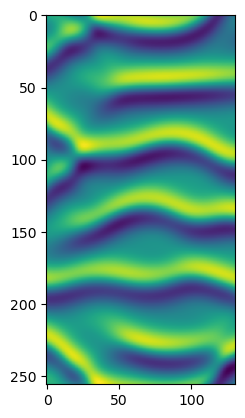

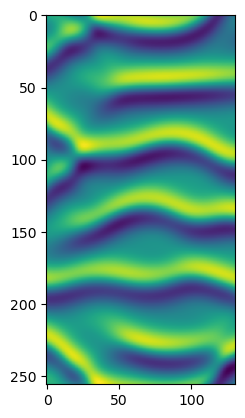

In [9]:
plt.figure()
plt.imshow(real[0,:,0].cpu().numpy().T)

plt.figure()
plt.imshow(synthetic[0,:,0].cpu().numpy().T)

In [10]:
((real - synthetic)**2).flatten(1)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])